<a href="https://colab.research.google.com/github/MaFe2049/Proyecto_Python1/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

#tienda = pd.read_csv(url)
#tienda2 = pd.read_csv(url2)
#tienda3 = pd.read_csv(url3)
#tienda4 = pd.read_csv(url4)

#tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [42]:
archivos = {
   'Sucursal 1' : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
'Sucursal 2' : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
'Sucursal 3' : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
'Sucursal 4' : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

dataframes = []
for nombre, url in archivos.items():
    df = pd.read_csv(url)
    df['Sucursal'] = nombre
    dataframes.append(df)

for nombre, url in archivos.items():
    df = pd.read_csv(url2)
    df['Sucursal'] = nombre
    dataframes.append(df)

for nombre, url in archivos.items():
    df = pd.read_csv(url3)
    df['Sucursal'] = nombre
    dataframes.append(df)

    df = pd.read_csv(url4)
    df['Sucursal'] = nombre
    dataframes.append(df)


    df_total = pd.concat(dataframes, ignore_index=True) #esta es la variable que voy a utilizar en todas los calculos

print(df_total.head())

            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Sucursal  
0  Tarjeta de crédito                   8   4.60971 -74.08175  Sucursal 1  


#1. Análisis de facturación



In [58]:
ingresos_por_sucursal = df_total.groupby('Sucursal')['Precio'].sum()
print(ingresos_por_sucursal)

Sucursal
tienda     1.150880e+09
tienda2    1.116344e+09
tienda3    1.098020e+09
tienda4    1.038376e+09
Name: Precio, dtype: float64


# 2. Ventas por categoría

In [59]:
ventas_por_categoria = df_total.groupby(['Sucursal','Categoría del Producto']).size().reset_index(name='cantidad')
ventas_por_categoria


ventas_ordenadas = ventas_por_categoria.sort_values(by='cantidad', ascending=False)
print(ventas_ordenadas)

   Sucursal   Categoría del Producto  cantidad
23  tienda3                  Muebles       499
31  tienda4                  Muebles       480
7    tienda                  Muebles       465
27  tienda4             Electrónicos       451
19  tienda3             Electrónicos       451
3    tienda             Electrónicos       448
15  tienda2                  Muebles       442
11  tienda2             Electrónicos       422
29  tienda4                 Juguetes       338
5    tienda                 Juguetes       324
21  tienda3                 Juguetes       315
13  tienda2                 Juguetes       313
2    tienda        Electrodomésticos       312
10  tienda2        Electrodomésticos       305
1    tienda     Deportes y diversión       284
18  tienda3        Electrodomésticos       278
25  tienda4     Deportes y diversión       277
17  tienda3     Deportes y diversión       277
9   tienda2     Deportes y diversión       275
26  tienda4        Electrodomésticos       254
12  tienda2  

# 3. Calificación promedio de la tienda


In [60]:
promedios = df_total.groupby('Sucursal')['Calificación'].mean().reset_index()
print(promedios)

  Sucursal  Calificación
0   tienda      3.976685
1  tienda2      4.037304
2  tienda3      4.048326
3  tienda4      3.995759


# 4. Productos más y menos vendidos

In [61]:
ventas_por_producto = df_total.groupby(['Sucursal','Producto']).size().reset_index(name='cantidad')
ventas_por_producto

,Sucursal,Producto,cantidad
0,tienda,Ajedrez de madera,49
1,tienda,Armario,60
2,tienda,Asistente virtual,40
3,tienda,Auriculares,50
4,tienda,Auriculares con micrófono,33
...,...,...,...
199,tienda4,Smartwatch,39
200,tienda4,Sofá reclinable,47
201,tienda4,TV LED UHD 4K,40
202,tienda4,Tablet ABXY,45


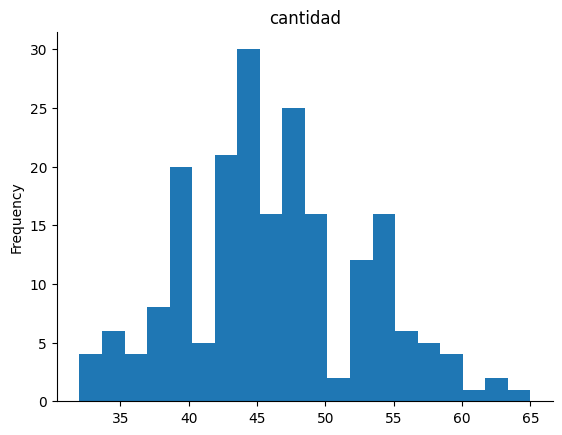

In [62]:
from matplotlib import pyplot as plt
ventas_por_producto['cantidad'].plot(kind='hist', bins=20, title='cantidad')
plt.gca().spines[['top', 'right',]].set_visible(False)

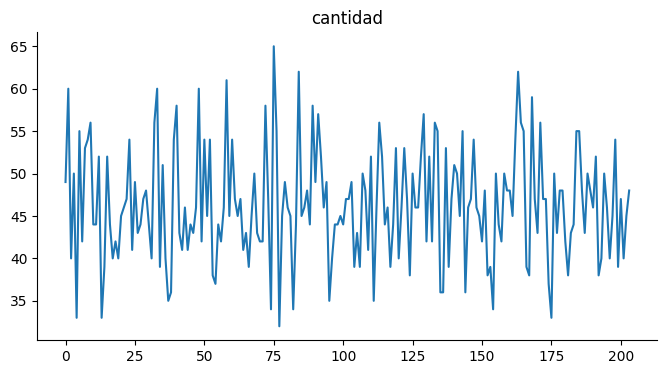

In [63]:
from matplotlib import pyplot as plt
ventas_por_producto['cantidad'].plot(kind='line', figsize=(8, 4), title='cantidad')
plt.gca().spines[['top', 'right']].set_visible(False)

In [64]:
top_y_flop = ventas_por_producto.groupby('Sucursal').apply(
    lambda x: pd.DataFrame({
        'Producto Más Vendido': [x.loc[x['cantidad'].idxmax(), 'Producto']],
        'Ventas Máximas': [x['cantidad'].max()],
        'Producto Menos Vendido': [x.loc[x['cantidad'].idxmin(), 'Producto']],
        'Ventas Mínimas': [x['cantidad'].min()]
    })
).reset_index(drop=True)

print(top_y_flop)

        Producto Más Vendido  Ventas Máximas     Producto Menos Vendido  \
0                    Armario              60  Auriculares con micrófono   
1  Iniciando en programación              65              Juego de mesa   
2              Kit de bancas              57    Bloques de construcción   
3                   Cama box              62         Guitarra eléctrica   

   Ventas Mínimas  
0              33  
1              32  
2              35  
3              33  


/tmp/ipython-input-64-4292195564.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_y_flop = ventas_por_producto.groupby('Sucursal').apply(


# 5. Envío promedio por tienda

In [65]:
promedio_por_tienda = df_total.groupby('Sucursal')['Costo de envío'].mean().reset_index()
promedio_por_tienda.rename(columns={'Costo de Envío': 'Promedio Costo de Envío'}, inplace=True)

print(promedio_por_tienda)


  Sucursal  Costo de envío
0   tienda    26018.609580
1  tienda2    25216.235693
2  tienda3    24805.680373
3  tienda4    23459.457167


# 6. Graficas




/tmp/ipython-input-66-2325025670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_tienda, x='Sucursal', y='Costo de envío', palette='Blues_d')


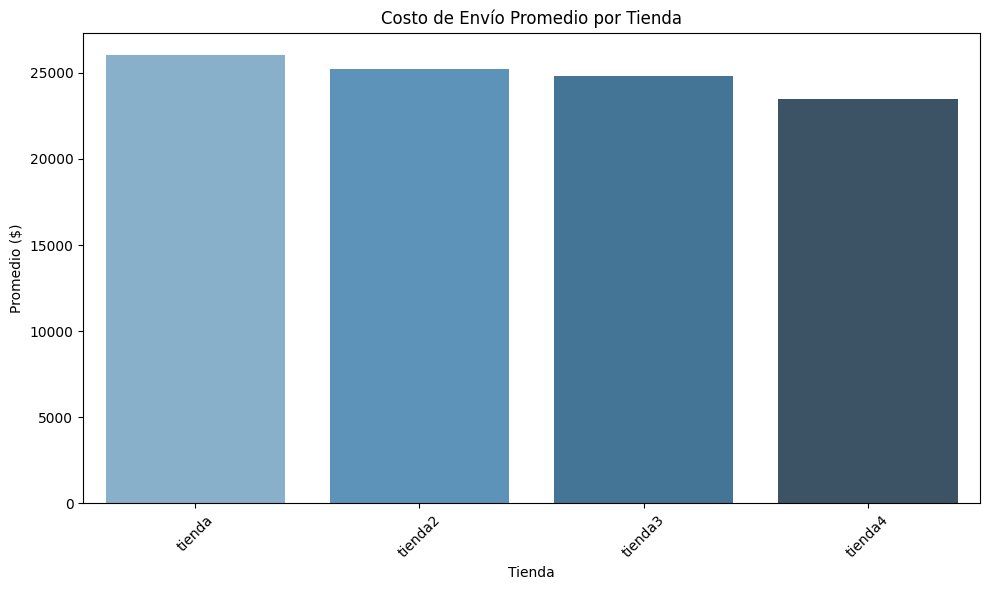

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=promedio_por_tienda, x='Sucursal', y='Costo de envío', palette='Blues_d')

plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Promedio ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-69-1271172312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= promedios, x='Sucursal', y='Calificación', palette='Blues_d')


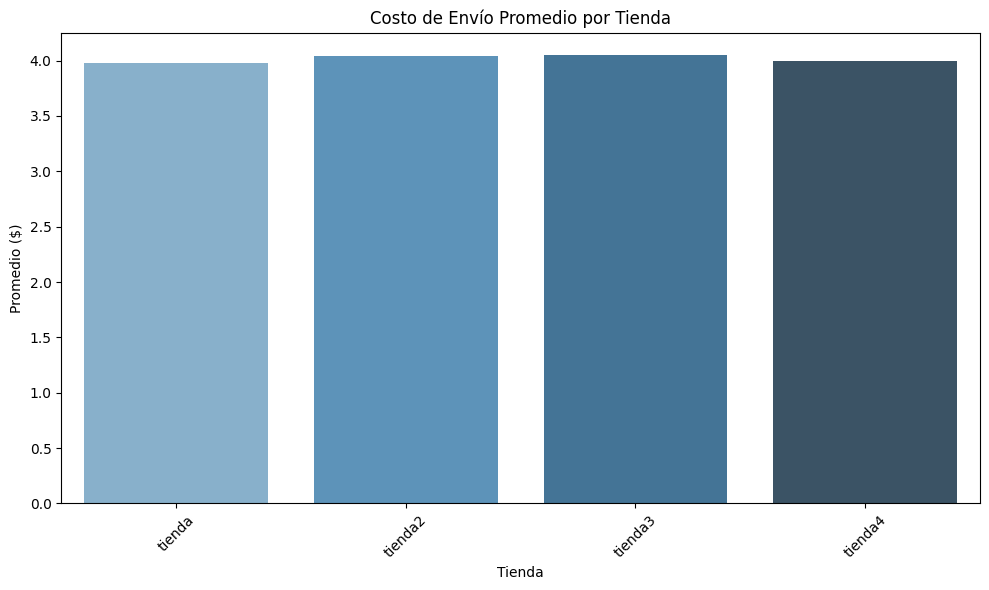

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data= promedios, x='Sucursal', y='Calificación', palette='Blues_d')

plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Promedio ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()